In [108]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
file_path = 'INSTData.csv'

data = pd.read_csv(file_path)

print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Account               1000 non-null   object
 3   Title                 983 non-null    object
 4   Link                  1000 non-null   object
 5   Category              909 non-null    object
 6   Followers             1000 non-null   int64 
 7   Audience Country      993 non-null    object
 8   Authentic engagement  1000 non-null   int64 
 9   Engagement avg        1000 non-null   int64 
 10  Scraped               1000 non-null   object
dtypes: int64(4), object(7)
memory usage: 86.1+ KB
None


,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8


In [109]:
cleaned_data = data.dropna(subset=['Category', 'Followers'])
cleaned_data.drop(['Country', 'Scraped'], axis='columns', inplace=True)

print(cleaned_data.info())
cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  909 non-null    int64 
 1   Account               909 non-null    object
 2   Title                 894 non-null    object
 3   Link                  909 non-null    object
 4   Category              909 non-null    object
 5   Followers             909 non-null    int64 
 6   Audience Country      906 non-null    object
 7   Authentic engagement  909 non-null    int64 
 8   Engagement avg        909 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 71.0+ KB
None


/var/folders/z5/hfsnbsms34gcsv7fpbrc13qr0000gn/T/ipykernel_7018/1614589502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(['Country', 'Scraped'], axis='columns', inplace=True)


,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg
0,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000
1,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000
2,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000
3,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000
4,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000


In [110]:
cleaned_data['Category'] = cleaned_data['Category'].str.split('|')

exploded_data = cleaned_data.explode('Category')

category_followers = exploded_data.groupby('Category',)['Followers'].sum().sort_values(ascending=False)

top_10_categories_followers = category_followers.head(10)

top_10_categories_followers


/var/folders/z5/hfsnbsms34gcsv7fpbrc13qr0000gn/T/ipykernel_7018/1535818679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Category'] = cleaned_data['Category'].str.split('|')


Category
Music                 7447500000
Actors/actresses      6575900000
Cinema                6575900000
Sports with a ball    3924800000
Lifestyle             2895600000
Fashion               1951400000
Modeling              1947400000
Beauty                1538700000
Shows                 1316100000
Photography            915700000
Name: Followers, dtype: int64

In [111]:
total_followers = category_followers.sum()

top_10_categories_percentage = (top_10_categories_followers / total_followers * 100).sort_values(ascending=False)

top_10_categories_percentage


Category
Music                 16.097969
Actors/actresses      14.213982
Cinema                14.213982
Sports with a ball     8.483559
Lifestyle              6.258916
Fashion                4.218003
Modeling               4.209357
Beauty                 3.325941
Shows                  2.844785
Photography            1.979310
Name: Followers, dtype: float64

In [112]:
most_frequent_categories = exploded_data['Category'].value_counts().head(10)

most_frequent_categories


Category
Cinema                274
Actors/actresses      274
Music                 261
Lifestyle             158
Sports with a ball    117
Modeling               80
Shows                  68
Beauty                 42
Fashion                38
Artists                34
Name: count, dtype: int64

In [113]:
category_engagement = exploded_data.groupby('Category')['Engagement avg'].sum().sort_values(ascending=False)

top_10_categories_engagement = category_engagement.head(10)

top_10_categories_engagement


Category
Music                 244507400
Cinema                210976900
Actors/actresses      210976900
Lifestyle             120933200
Sports with a ball     79245100
Modeling               65132700
Fashion                52762400
Beauty                 48692500
Shows                  36313300
Fun                    20677600
Name: Engagement avg, dtype: int64

In [114]:
followers_by_country = cleaned_data.groupby('Audience Country')['Followers'].sum().sort_values(ascending=False)

top_10_countries_followers = followers_by_country.head(10)

top_10_countries_followers


Audience Country
United States     8929400000
India             4906300000
Brazil            3490300000
Indonesia         2002300000
Spain              780200000
Mexico             751400000
Argentina          623100000
Russia             395500000
United Kingdom     283100000
Turkey             259400000
Name: Followers, dtype: int64

In [115]:
exploded_data['Engagement Rate'] = exploded_data['Engagement avg'] / exploded_data['Followers'] * 100

engagement_rate_analysis = exploded_data.groupby('Category')['Engagement Rate'].mean().sort_values(ascending=False)

top_10_engagement_rate = engagement_rate_analysis.head(10)

top_10_engagement_rate


Category
Management    20.671476
Marketing     20.671476
Business       7.527041
Careers        7.527041
Lifestyle      6.970025
Humor          5.320604
Happiness      5.320604
Fun            5.320604
Music          5.314352
Gadgets        5.193908
Name: Engagement Rate, dtype: float64

In [116]:
segments = {
    'Sports': ['Sports with a ball'],
    'Entertainment': ['Music', 'Cinema', 'Shows', 'Actors/actresses'],
    'Lifestyle': ['Lifestyle', 'Fashion', 'Modeling', 'Beauty', 'Photography']
}

segment_data = {}
for segment, categories in segments.items():
    segment_followers = exploded_data[exploded_data['Category'].isin(categories)]['Followers'].sum()
    segment_engagement = exploded_data[exploded_data['Category'].isin(categories)]['Engagement avg'].sum()
    segment_data[segment] = {
        'Followers': segment_followers,
        'Engagement': segment_engagement
    }

segment_df = pd.DataFrame(segment_data).T

segment_df


,Followers,Engagement
Sports,3924800000,79245100
Entertainment,21915400000,702774500
Lifestyle,9248800000,292936500


In [117]:
correlation_followers_engagement = exploded_data['Followers'].corr(exploded_data['Engagement avg'])

correlation_followers_engagement


0.41822602780705387

In [118]:
average_engagement_rate = engagement_rate_analysis.mean()
niche_categories = engagement_rate_analysis[engagement_rate_analysis > average_engagement_rate]

niche_categories.sort_values(ascending=False).head(10)


Category
Management    20.671476
Marketing     20.671476
Business       7.527041
Careers        7.527041
Lifestyle      6.970025
Humor          5.320604
Happiness      5.320604
Fun            5.320604
Music          5.314352
Gadgets        5.193908
Name: Engagement Rate, dtype: float64

In [119]:
import matplotlib.pyplot as plt

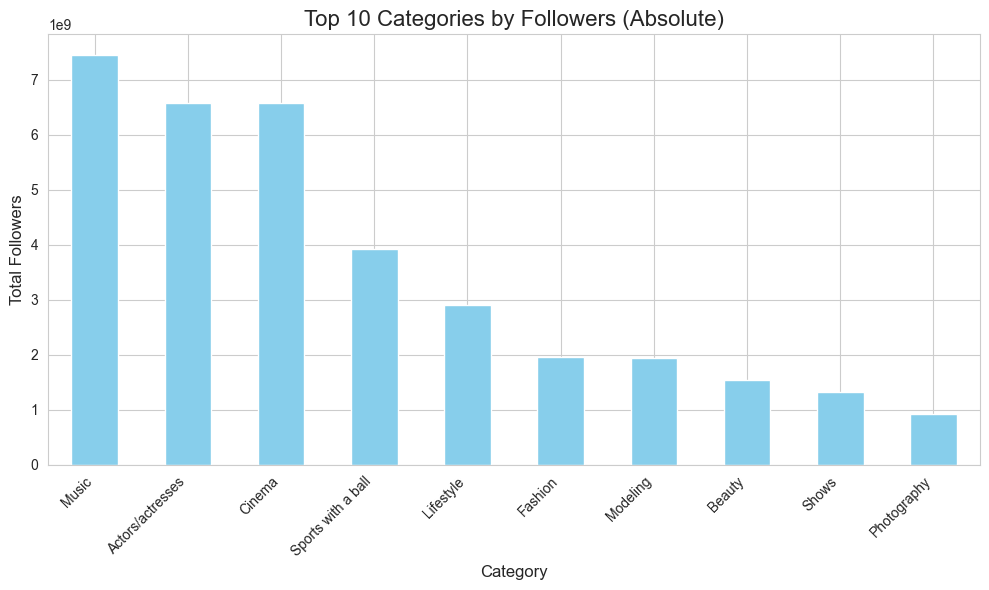

In [120]:
# 1. Top 10 categories by followers (absolute values)
plt.figure(figsize=(10, 6))
top_10_categories_followers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Followers (Absolute)', fontsize=16)
plt.ylabel('Total Followers', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

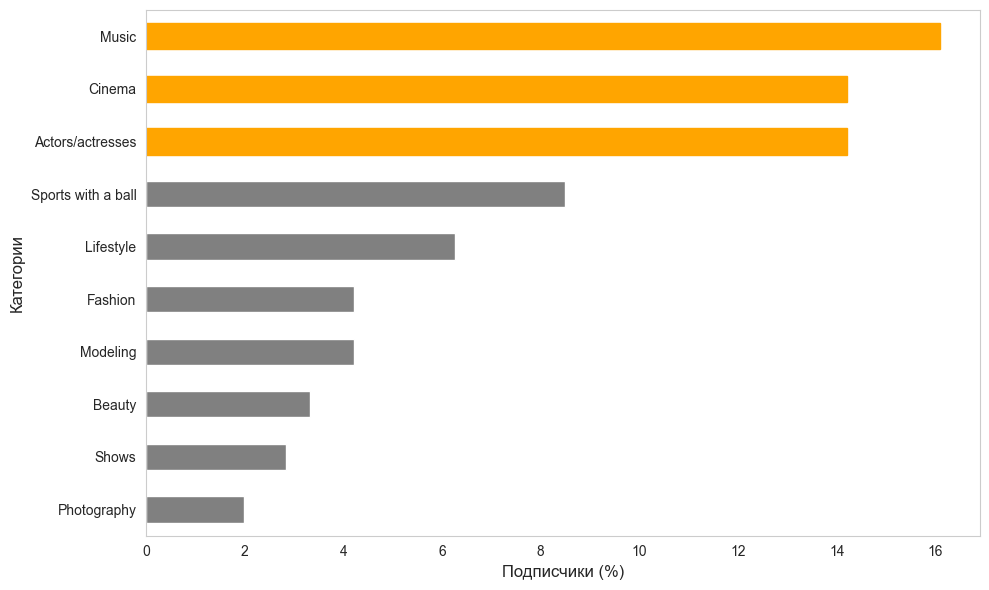

Category
Music                 16.097969
Actors/actresses      14.213982
Cinema                14.213982
Sports with a ball     8.483559
Lifestyle              6.258916
Fashion                4.218003
Modeling               4.209357
Beauty                 3.325941
Shows                  2.844785
Photography            1.979310
Name: Followers, dtype: float64


In [121]:
# 2. Top 10 categories by followers (percentage)
sorted_series = top_10_categories_percentage.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
ax = sorted_series.plot.barh(color='grey', width=0.5)

for i in range(len(ax.patches)-3, len(ax.patches)):
    ax.patches[i].set_color('orange')

plt.xlabel('Подписчики (%)', fontsize=12)
plt.ylabel('Категории', fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()

print(top_10_categories_percentage)

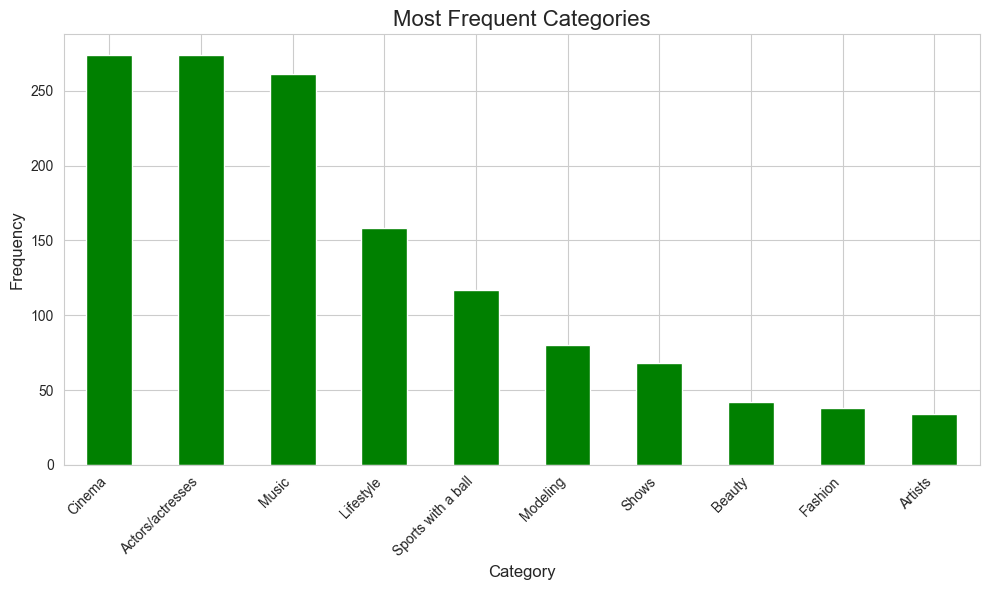

In [122]:
# 3. Most frequent categories
plt.figure(figsize=(10, 6))
most_frequent_categories.plot(kind='bar', color='green')
plt.title('Most Frequent Categories', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

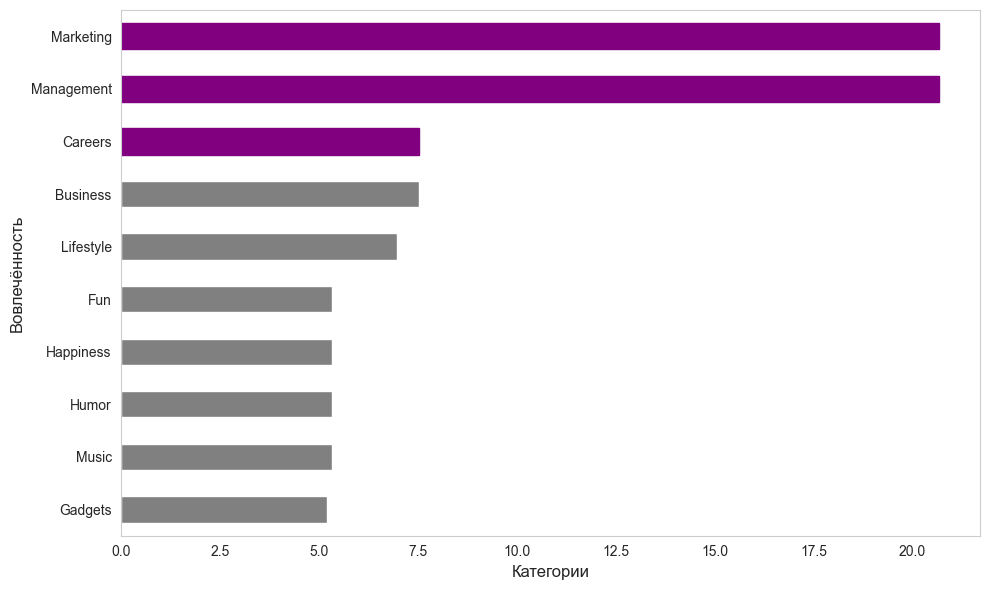

In [123]:
# 4. Top 10 categories by engagement
plt.figure(figsize=(10, 6))
top_10_categories_engagement_sorted = top_10_engagement_rate.sort_values(ascending=True)
ax = top_10_categories_engagement_sorted.plot.barh(color='grey', width=0.5)

for i in range(len(ax.patches)-3, len(ax.patches)):
    ax.patches[i].set_color('purple')
    
plt.ylabel('Вовлечённость', fontsize=12)
plt.xlabel('Категории', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

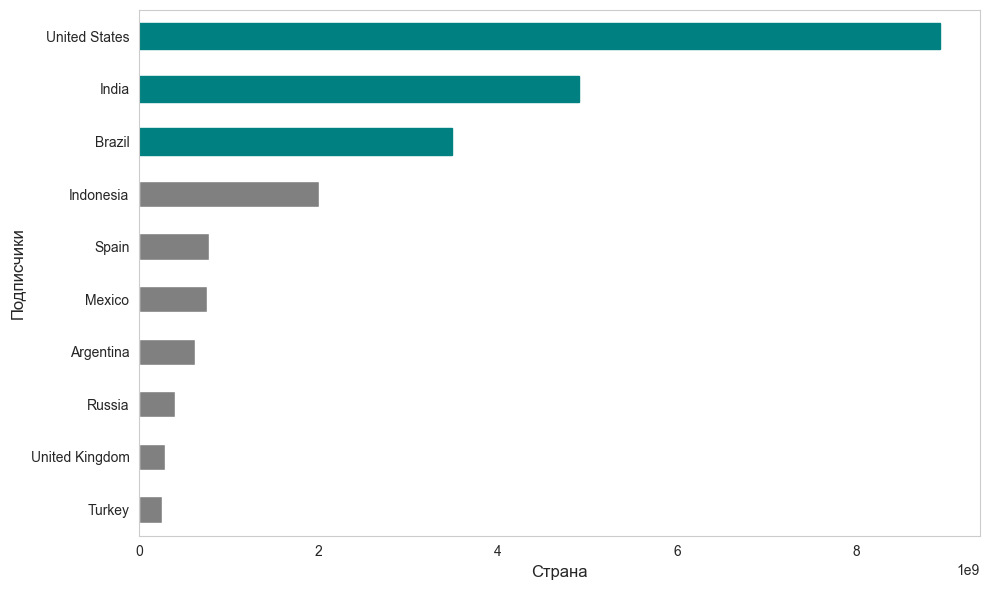

In [124]:
 # 5. Followers by country (top 10)
plt.figure(figsize=(10, 6))
top_10_countries_followers_sorted = top_10_countries_followers.sort_values(ascending=True)
ax = top_10_countries_followers_sorted.plot.barh( color='grey', width=0.5)

for i in range(len(ax.patches)-3, len(ax.patches)):
    ax.patches[i].set_color('teal')
    
plt.ylabel('Подписчики', fontsize=12)
plt.xlabel('Страна', fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()

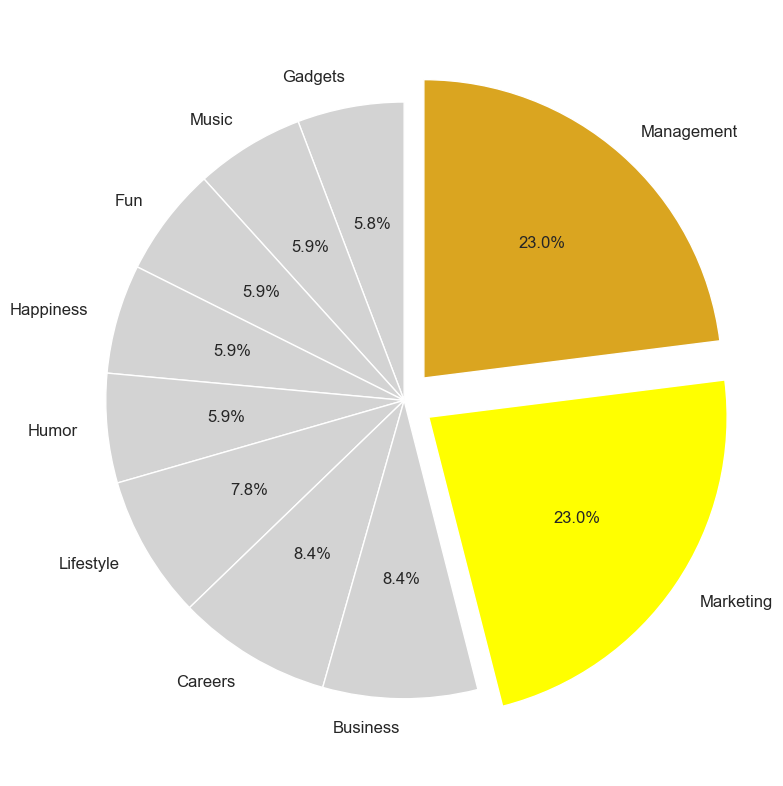

In [125]:
# 6. Engagement rate analysis (top 10 categories)
import numpy as np

sorted_top_10 = top_10_engagement_rate.sort_values(ascending=False)

reversed_data = np.flip(sorted_top_10)

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['lightgray'] * (len(reversed_data) - 2) + ['yellow', 'goldenrod']

wedges, texts, autotexts = ax.pie(
    reversed_data.values,
    labels=np.flip(sorted_top_10.index),
    colors=colors,
    explode=[0] * (len(colors) - 2) + [0.1, 0.1],
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

plt.axis('equal')

plt.tight_layout()
plt.show()

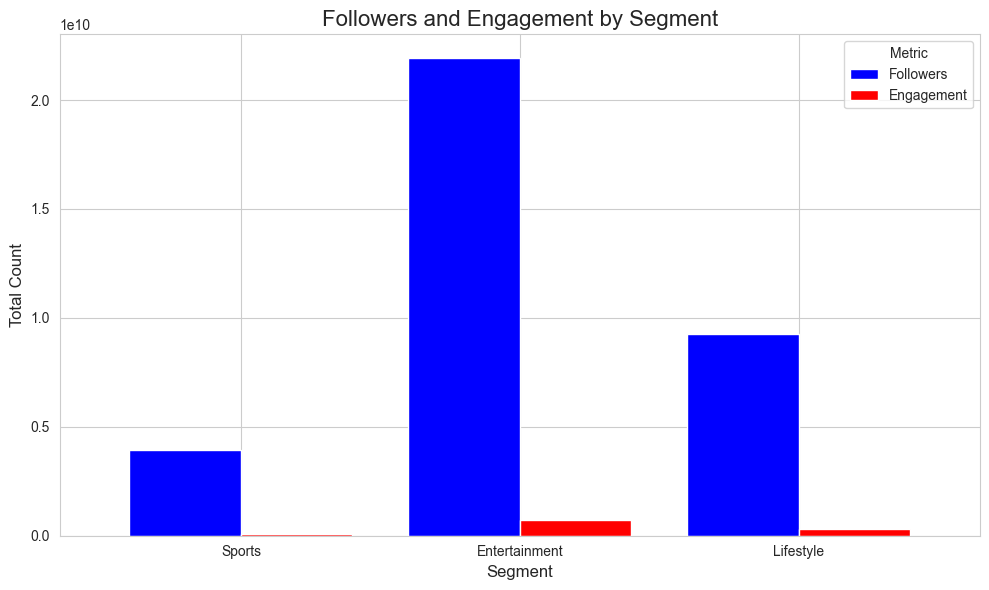

In [126]:
# 7. Grouped segments by followers and engagement
segment_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], width=0.8)
plt.title('Followers and Engagement by Segment', fontsize=16)
plt.ylabel('Total Count', fontsize=12)
plt.xlabel('Segment', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()
plt.show()

In [127]:
from scipy.stats import ttest_ind
exploded_data['Engagement Rate'] = exploded_data['Engagement avg'] / exploded_data['Followers'] * 100

average_engagement_rate = exploded_data['Engagement Rate'].mean()
high_engagement = exploded_data[exploded_data['Engagement Rate'] > average_engagement_rate]['Followers']
low_engagement = exploded_data[exploded_data['Engagement Rate'] <= average_engagement_rate]['Followers']

t_stat, p_value = ttest_ind(high_engagement, low_engagement, equal_var=False)

{
    "t-statistic": t_stat,
    "p-value": p_value,
    "result": "Reject Null Hypothesis" if p_value < 0.05 else "Fail to Reject Null Hypothesis"
}


{'t-statistic': -14.009871702641577,
 'p-value': 7.755958244534472e-42,
 'result': 'Reject Null Hypothesis'}

Группированные данные:
               Category   Followers  Authentic engagement
0          Accessories    94400000                106200
1     Actors/actresses  6575900000             159909100
2        Adult content   102400000               2553900
3              Animals    10000000                343800
4                  Art   639000000              13646400
5              Artists   639000000              13646400
6               Beauty  1538700000              35183800
7             Business   194600000               5821400
8              Careers   194600000               5821400
9                 Cars   172900000                917600
10              Cinema  6575900000             159909100
11            Clothing   760100000               8469700
12             Coaches    10600000                181100
13    Comics  sketches   108900000                734900
14           Computers   169000000               5004800
15             Cooking    73400000                927500
16     

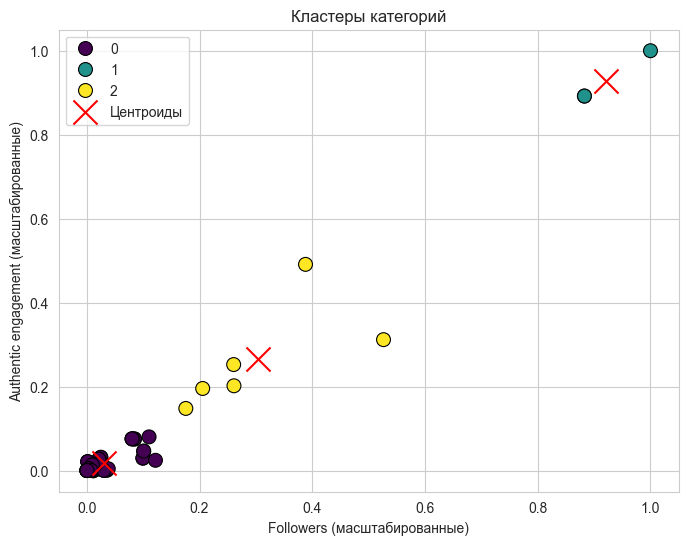

In [128]:
try:
    df = exploded_data.groupby('Category')[['Followers', 'Authentic engagement']].sum().reset_index()
    print("Группированные данные:\n", df)

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df[['Followers', 'Authentic engagement']])

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, df['cluster'])
    print(f"Коэффициент силуэта: {silhouette_avg:.2f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_scaled[:, 0],
        y=X_scaled[:, 1],
        hue=df['cluster'],
        palette='viridis',
        s=100,
        edgecolor='black',
        legend='full'
    )

    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        s=300,
        c='red',
        label='Центроиды',
        marker='x'
    )

    plt.title('Кластеры категорий')
    plt.xlabel('Followers (масштабированные)')
    plt.ylabel('Authentic engagement (масштабированные)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Произошла ошибка: {e}")


Группированные данные:
               Category   Followers  Engagement Rate
0          Accessories    94400000         0.302176
1     Actors/actresses  6575900000      1320.928337
2        Adult content   102400000        36.170305
3              Animals    10000000         4.402000
4                  Art   639000000       117.334130
5              Artists   639000000       117.334130
6               Beauty  1538700000       175.058206
7             Business   194600000        60.216332
8              Careers   194600000        60.216332
9                 Cars   172900000         7.649758
10              Cinema  6575900000      1320.928337
11            Clothing   760100000        38.478097
12             Coaches    10600000         3.152830
13    Comics  sketches   108900000         4.396071
14           Computers   169000000        51.939080
15             Cooking    73400000         3.715132
16                   D    13500000         1.551852
17              Design    13500000      

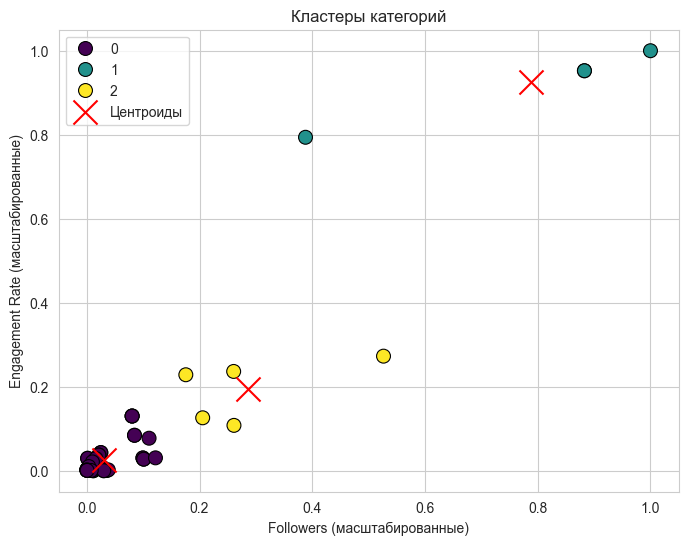

In [129]:
try:
    df = exploded_data.groupby('Category')[['Followers', 'Engagement Rate']].sum().reset_index()
    print("Группированные данные:\n", df)

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(df[['Followers', 'Engagement Rate']])

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, df['cluster'])
    print(f"Коэффициент силуэта: {silhouette_avg:.2f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=X_scaled[:, 0],
        y=X_scaled[:, 1],
        hue=df['cluster'],
        palette='viridis',
        s=100,
        edgecolor='black',
        legend='full'
    )

    plt.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        s=300,
        c='red',
        label='Центроиды',
        marker='x'
    )

    plt.title('Кластеры категорий')
    plt.xlabel('Followers (масштабированные)')
    plt.ylabel('Engagement Rate (масштабированные)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"Произошла ошибка: {e}")
